## CNN 스팸 메일 분류

### 데이터 로드 및 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<ipython-input-1-4cc5b33a9de7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


* https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv

In [51]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename='spam.csv')
data = pd.read_csv('spam.csv', encoding='latin-1')
print(len(data))

5572


In [4]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

# data['v1'] = data['v1'].replace(['ham','spam'], [0,1])
data['v1'] = data['v1'].map({'ham':0, 'spam':1})
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [53]:
data.duplicated(subset=['v2']).sum()

403

In [54]:
print(len(data))
data.drop_duplicates(subset=['v2'], inplace=True)
len(data)

5572


5169

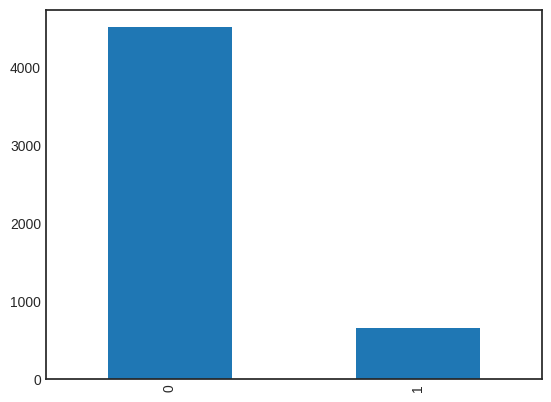

In [16]:
data['v1'].value_counts().plot(kind='bar');

In [81]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
data[data['v1'] == 1 ]

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
8,1,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,1,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
11,1,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O å£250 3 WANT å£800
5547,1,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records."
5566,1,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"


In [87]:
data[data['v1'] == 0 ]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
6,0,Even my brother is not like to speak with me. They treat me like aids patent.
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other suggestions?"
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [21]:
data.groupby('v1').size()

v1
0    4516
1     653
dtype: int64

In [18]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [22]:
X_data = data['v2']
y_data = data['v1']

In [29]:
X_data[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [30]:
y_data[:5]

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int64

In [23]:
vocab_size = 1000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)


In [28]:
tokenizer.index_word

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'have',
 17: 'call',
 18: 'that',
 19: 'on',
 20: '2',
 21: 'are',
 22: 'now',
 23: 'so',
 24: 'but',
 25: 'not',
 26: 'can',
 27: 'at',
 28: 'or',
 29: "i'm",
 30: 'do',
 31: 'be',
 32: 'get',
 33: 'will',
 34: 'just',
 35: 'if',
 36: 'with',
 37: 'we',
 38: 'no',
 39: 'this',
 40: 'ur',
 41: 'up',
 42: 'gt',
 43: 'lt',
 44: '4',
 45: 'how',
 46: 'when',
 47: 'go',
 48: 'from',
 49: 'ok',
 50: 'out',
 51: 'all',
 52: 'what',
 53: 'free',
 54: 'know',
 55: 'like',
 56: 'then',
 57: 'got',
 58: 'good',
 59: 'come',
 60: 'am',
 61: 'was',
 62: 'time',
 63: 'its',
 64: 'only',
 65: 'day',
 66: 'want',
 67: 'love',
 68: 'there',
 69: 'he',
 70: 'text',
 71: 'send',
 72: 'going',
 73: 'one',
 74: 'need',
 75: 'by',
 76: 'lor',
 77: 'home',
 78: 'as',
 79: 'about',
 80: 'still',
 81: 'see',
 82: 'txt',
 83: 'back',
 84: 'r',
 85: 

In [24]:
sequences[:2]

[[47, 433, 780, 705, 662, 64, 8, 94, 121, 434, 142, 68, 57, 137],
 [49, 306, 435, 6]]

In [31]:
X_data = sequences

print('메일 최대 길이: {}'.format(max(len(l) for l in X_data)))
print('메일 평균 길이 : {}'.format((sum(map(len, X_data))/len(X_data))))

메일 최대 길이: 172
메일 평균 길이 : 12.566840781582512


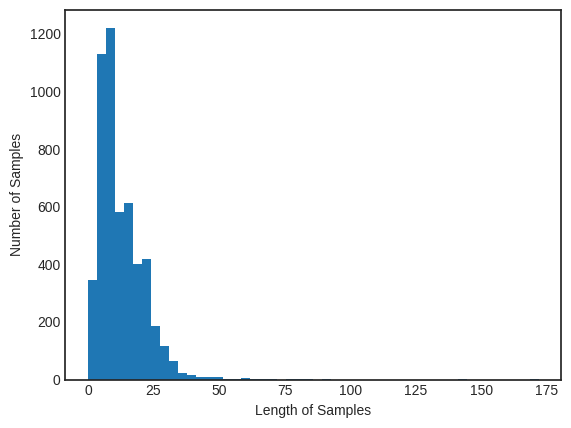

In [32]:
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [33]:
max_len = 60
data = pad_sequences(X_data, maxlen=max_len)
print(data.shape)

(5169, 60)


In [34]:
n_train = int(len(sequences) * 0.8)
n_test = int(len(sequences) - n_train)

print(n_train)
print(n_test)

4135
1034


In [35]:
# X는 이미 numpy array이다

X_train = data[:n_train]
y_train = np.array(y_data[:n_train])

X_test = data[n_train:]
y_test = np.array(y_data[n_train:])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4135, 60)
(4135,)
(1034, 60)
(1034,)


### 모델 구성

In [44]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [46]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, strides=1, padding='valid', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 conv1d (Conv1D)             (None, None, 32)          5152      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [47]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

### 모델 학습

In [48]:
history = model.fit(X_train, y_train,
                    epochs= 10,
                    batch_size = 64,
                    validation_split=0.2,
                    callbacks=[es,mc])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.4656 - acc: 0.8528
Epoch 1: val_acc improved from -inf to 0.87304, saving model to best_model.h5
52/52 [==============================] - 11s 109ms/step - loss: 0.4656 - acc: 0.8528 - val_loss: 0.3707 - val_acc: 0.8730
Epoch 2/10
 1/52 [..............................] - ETA: 7s - loss: 0.5516 - acc: 0.7969

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - ETA: 0s - loss: 0.3030 - acc: 0.8761
Epoch 2: val_acc improved from 0.87304 to 0.95889, saving model to best_model.h5
52/52 [==============================] - 4s 81ms/step - loss: 0.3030 - acc: 0.8761 - val_loss: 0.1928 - val_acc: 0.9589
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 0.1048 - acc: 0.9731
Epoch 3: val_acc improved from 0.95889 to 0.98065, saving model to best_model.h5
52/52 [==============================] - 3s 48ms/step - loss: 0.1048 - acc: 0.9731 - val_loss: 0.0727 - val_acc: 0.9807
Epoch 4/10
52/52 [==============================] - ETA: 0s - loss: 0.0571 - acc: 0.9867
Epoch 4: val_acc improved from 0.98065 to 0.98186, saving model to best_model.h5
52/52 [==============================] - 2s 31ms/step - loss: 0.0571 - acc: 0.9867 - val_loss: 0.0686 - val_acc: 0.9819
Epoch 5/10
52/52 [==============================] - ETA: 0s - loss: 0.0393 - acc: 0.9903
Epoch 5: val_acc did not improve from 0.98186
52/52 

### 시각화

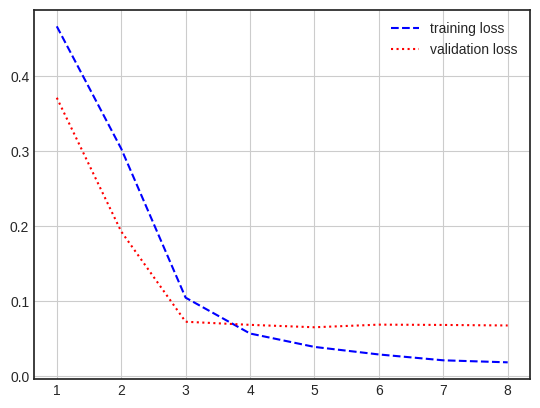

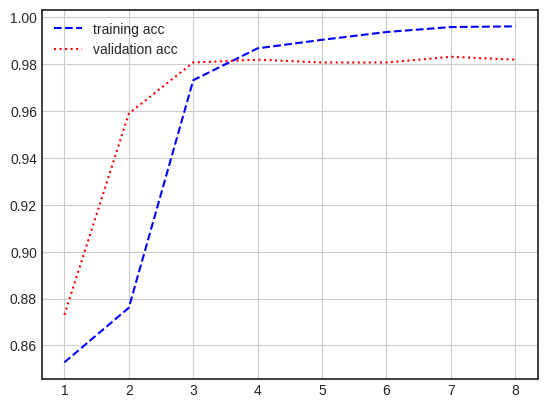

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()



In [50]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 7ms/step - loss: 0.0747 - acc: 0.9778


[0.07468951493501663, 0.9777562618255615]